# Implementation from Scratch

<br />

I am going to implement algorithms by using the least kinds of libraries such as Numpy possible.

## [Task 1] Create a Class of K-means

<br />

I am going to create a class of K-means that is a nonhierarchical clustering method.

#### Artificial Dataset for Clustering

<br />

I prepare an artificial dataset for the validation of the clustering.

The make_blobs function outputs correct labels, but I do not use them on this task.

In [1]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [2]:
X

array([[ 0.72086751,  3.71347124],
       [-1.89468423,  7.96898545],
       [ 1.35678894,  4.36462484],
       [ 1.05374379,  4.49286859],
       [ 1.59141542,  4.90497725],
       [ 0.78260667,  4.15263595],
       [-1.95751686,  3.87291474],
       [-0.77354537,  7.87923564],
       [ 0.12313498,  5.27917503],
       [-1.43284669,  7.71577043],
       [-0.92819001,  7.02698199],
       [-1.74836345,  7.06307447],
       [-1.26789718,  7.25141327],
       [-0.98661744,  7.74968685],
       [-0.81984047,  7.50994722],
       [ 2.99684287,  0.22378413],
       [ 1.46870582,  1.86947425],
       [-0.33533163,  3.390122  ],
       [-1.86407034,  2.93379754],
       [ 2.62496786,  0.28025075],
       [ 2.11114739,  3.57660449],
       [-1.8219901 ,  7.61654999],
       [-1.91186205,  3.18750686],
       [ 2.28809874,  0.12954182],
       [ 0.5285368 ,  4.49723858],
       [-1.57613028,  2.58614312],
       [-0.565433  ,  3.65813966],
       [ 0.802314  ,  4.38196181],
       [ 2.79939362,

#### Objective Function

<br />

K-means fit datasets by computing $r_{nk}$ and $\mu$ minimizing SSE, sum of squared errors.

I use this to take the number of clusters, $K$ on the elbow method.

$$
SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2
$$

$n$: index of a data point

$k$: index of a cluster

$X_n$: $n$th data point

$\mu_k$: $k$th central point

$r_{nk}$: 1 if the data point $X_n$ is in the cluster $k$, 0 if not.

#### Fitting

<br />

Basics of fitting by K-means are repeating the following 2 steps.

#### Euclidean distance

<br />

In terms of K-means, *near* means a value of the Euclidean distance between 2 points is small.

It can be computed by the following equation when I let $p, q$ vectors.

$$
\|q-p\| = \sqrt{(q-p)\cdot(q-p)}
$$

#### Initial values

<br />

In this task, I will take the most simplest way that I choose k points as initial values randomly from data points $X_n$.

#### Prediction

<br />

When I predict what cluster each new data point belong to, I do the same work with the first phase of fitting.

- On data points $X_n$, I will take centroids $\mu_k$ by fitting and choose $r_{nk}$ minimalizing the SSE.

<br />

To be concrete,

- I will assign each data point to the most nearest $\mu_k$.

In [72]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [213]:
# Create a class of K-means from scratch

class ScratchKMeans():
    """
    Implement K-means from scratch.
    
    Parameters
    ----------
    k: int
        The number of labels
    
    num_iter: int
        The number of iteration
    
    Attributes
    ----------
    centroids: ndarray whose shape is (n_features,n_iters)
        K centroids already fitted
    
    sse: 
    """
    
    def __init__(self, k, num_iter):
        # Record hyperparameters as attribute
        self.k = k
        self.iter = num_iter
    
    
    def fit(self, X):
        """
        Fit datasets by K-means.
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Features of train dataset
        """
        
        # Transform arrays to move their features to rows
        X = X.T
        
        # Set initial central points
        np.random.seed(32)
        index = np.array(range(X.shape[1]))
        np.random.shuffle(index)
        k_index = index[:self.k]
        self.centroids = X[:,k_index]
        
        # Update the centroids untill they are changing
        for i in range(self.iter):
            cluster_table = self.assign_cluster(X, self.centroids)
            temporary_centroids = self.update_centroids(X, cluster_table)
            if np.allclose(self.centroids, temporary_centroids):
                break
            else:
                self.centroids = temporary_centroids
#                 print("iter:",i)
        
        # Compute the SSE
        return np.sum(np.square(cluster_table))
    
    
    # Compute distances between each point and central points and assign them to theirown label
    def assign_cluster(self, X, centroids):
        """
        Assign each data point to the most nearest cluster.
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Features of train dataset
        
        centroids: ndarray whose shape is (n_features,n_iters)
            Initial k centroids
        
        Returns
        ----------
        cluster_table: ndarray whose shape is (n_samples,n_clusters)
            A table showing what cluster each data point belong to and distances between each data point and the most nearest cluster
        """
        
        cluster_table = np.zeros((X.shape[1], self.k))
        for i in range(X.shape[1]):
            min_d = 1e+10000
            label = 0
            for j in range(self.k):
                d = np.linalg.norm(X[:,i]-centroids[:,j])
                if d < min_d:
                    min_d = d
                    label = j
            cluster_table[i,label] = min_d
        
        return cluster_table
    
    
    # Update centroids
    def update_centroids(self, X, cluster_table):
        """
        Assign each data point to the most nearest cluster.
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Features of train dataset
        
        cluster_table: ndarray whose shape is (n_samples,n_clusters)
            A table showing what cluster each data point belong to and distances between each data point and the most nearest cluster
        
        Returns
        ----------
        centroids: ndarray whose shape is (n_features,n_iters)
            Updated k centroids
        """
        
        centroids = np.zeros((2, self.k))
        for i in range(self.k):
            index = np.where(cluster_table[:,i]!=0)
            centroids[0,i] = sum(X[0,index[0]])/len(index[0])
            centroids[1,i] = sum(X[1,index[0]])/len(index[0])
        
        return centroids
    
    
    def predict(self, X):
        """
        Predict datasets by K-means.
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Features of train dataset
        
        Returns
        ----------
        y_pred: ndarray whose shape is (n_samples,n_clusters)
            A table showing what cluster each data point belong to and distances between each data point and the most nearest cluster
        """
        
        # Transform arrays to move their features to rows
        X = X.T
        
        # Return a cluster table
        return self.assign_cluster(X, self.centroids)
    
    
    # Implement the Elbow method
    def elbow_method(self, X, kinds_of_clusters):
        """
        Implement the Elbow method.
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Features of train dataset
        
        kinds_of_clusters: int
            The number of kinds of clusters
        """
        
        k_list = []
        sse_list = []
        for i in range(kinds_of_clusters+1):
            kmeans = ScratchKMeans(i+1,100)
            sse = kmeans.fit(X)
            k_list.append(i+1)
            sse_list.append(sse)
        
        plt.figure(facecolor="azure", edgecolor="coral")
        plt.grid(True)
        
        plt.plot(k_list, sse_list)
        
        plt.title("Elbow Method")
        plt.xlabel("Number of Clusters")
        plt.ylabel("SSE")
        
        plt.show()

In [214]:
# Initialize the class

kmeans = ScratchKMeans(13,100)

In [215]:
# Fitting

kmeans.fit(X)

22.208689719369755

In [216]:
# Prediction

# kmeans.predict()

## [Task 2] Implement Elbow method

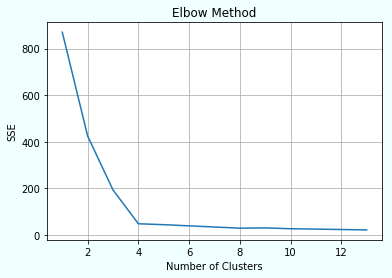

In [217]:
# Implement the Elbow method

kmeans.elbow_method(X, 12)

## [Task 3] Silhouette Plot

# Clustering Analysis

#### Data Analysis for wholesalers